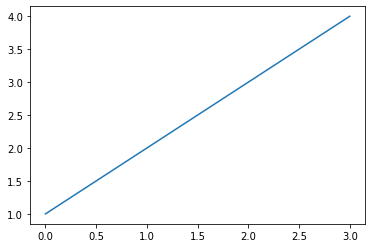

In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
from torch.optim import Adam
import numpy as np
import gym
import matplotlib.pyplot as plt

In [3]:
class LogitsNet(nn.Module):
    
    def __init__(self,input_dim,hidden,output_dim):
        super().__init__()
        
        self.fc1 = nn.Linear(input_dim,hidden)
        self.fc2 = nn.Linear(hidden,output_dim)
        self.relu = nn.ReLU()
        
    def forward(self,state):
        
        x = self.fc1(state)
        x = self.relu(x)
        logits = self.fc2(x)
        return logits
            

In [4]:
env = gym.make('CartPole-v1')

In [5]:
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

In [7]:
Episodes = 1000
gamma = 1

In [8]:
model = LogitsNet(input_dim,64,output_dim)
optimizer = Adam(model.parameters(),lr=0.001)

In [17]:
all_rewards = []
for episode in range(Episodes):
    done = False
    
    s = env.reset()
    
    logp = []
    actions = []
    rewards = []
    s_prime = []
    
    while not done:
        logits = model(torch.FloatTensor(s))
        pi = Categorical(logits = logits)
        action = pi.sample()
        log_prob = pi.log_prob(action)
        action = action.item()


        s_prime,reward,done,_ = env.step(action)
        logp.append(log_prob)
        rewards.append(reward)
        
        s = s_prime
        #if episode % 100 == 0:
        #    env.render()
    
    all_rewards.append(np.sum(rewards))
    if episode % 100 == 0:

        print(f'Episode {episode} Score: {np.sum(rewards)}')
        
    discounted_rewards = []        
    for t in range(len(rewards)):
        G_t = 0
        pw = 0
        
        for r in rewards[t:]:
            G_t = G_t + gamma**pw * r
            pw += 1
            
        discounted_rewards.append(G_t) 
        
    discounted_rewards = torch.FloatTensor(discounted_rewards)
    
    loss = - torch.stack(logp)@discounted_rewards
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
        
        

[-0.03312311  0.04331324  0.01254183 -0.00709772]
Episode 0 Score: 500.0
[ 0.00806197  0.02199922  0.01930684 -0.03711768]
[-0.01143796 -0.0172152  -0.0282624   0.02519386]
[0.01961778 0.00792613 0.0450671  0.04945166]
[ 0.0008294  -0.02565601  0.01197399  0.04518353]
[ 0.00473023  0.0078681  -0.0110932  -0.03218211]
[ 0.00432441 -0.00102601  0.04899793  0.03688155]
[-0.04669936 -0.0429568   0.01300867 -0.02743283]
[ 0.03461335 -0.0371448   0.01008113 -0.00573454]
[ 0.02793723 -0.00762757  0.02581862  0.04642008]
[ 0.02979307 -0.00300777  0.02925688  0.01141583]
[0.00615713 0.00604453 0.03920632 0.04312511]
[-0.03987836  0.00563466 -0.02309243  0.01100633]
[ 0.01632363  0.00849095 -0.03037786 -0.04536649]
[ 0.03013954  0.00112158 -0.00919468 -0.02608396]
[ 0.03176491 -0.02750217  0.00871462 -0.04226743]
[ 0.00403595  0.03305449 -0.00884976 -0.01703048]
[-0.00951064 -0.01308708 -0.04141048  0.02727212]
[-0.0058354   0.01332155 -0.00512319 -0.01808988]
[-0.00951505  0.00558087 -0.0281589

KeyboardInterrupt: 

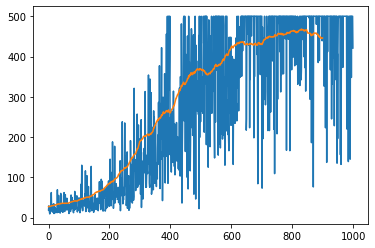

In [10]:
plt.plot(all_rewards);
plt.plot([np.mean(all_rewards[i:i+100]) for i in range(900)]);